In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Чтение данных
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [3]:
# Выводим первые 5 записей
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


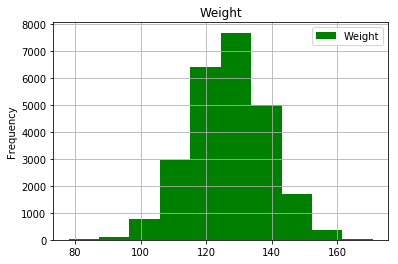

In [4]:
# Строим по записям гистограмму
data.plot(y='Weight', kind='hist', color='green', title='Weight')
plt.grid() # сеточка

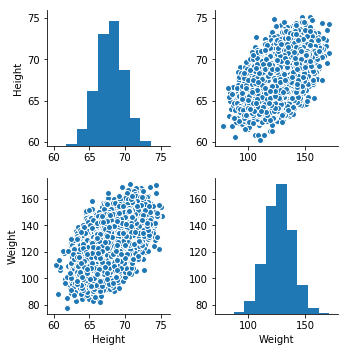

In [5]:
# Попарные зависимости признаков
sns.pairplot(data)

         Height    Weight  weight_cat
Index                                
1      65.78331  112.9925           1
2      71.51521  136.4873           2
3      69.39874  153.0269           3
4      68.21660  142.3354           2
5      67.78781  144.2971           2
6      68.69784  123.3024           2
7      69.80204  141.4947           2
8      70.01472  136.4623           2
9      67.90265  112.3723           1
10     66.78236  120.6672           2


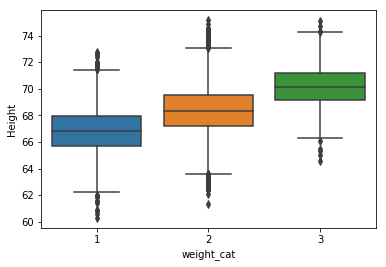

In [6]:
# Добавить новый признак ВЕС: 
# если вес < 120, то вернуть 1, вес >= 150, то метка -> 3, иначе -> 2.
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2
    

data['weight_cat'] = data['Weight'].apply(weight_category)
print(data[:10])
sns.boxplot(data=data, x='weight_cat', y='Height')

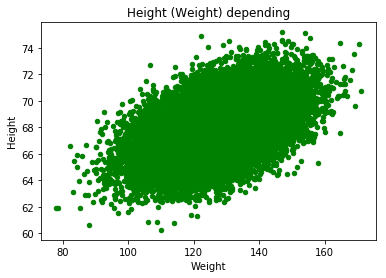

In [7]:
data.plot(x='Weight', y='Height', kind='scatter', 
          color='green', title='Height (Weight) depending')

## Задача восстановления регрессии

Пусть функция задаётся по двум параметрам $w_0$ и $w_1$ и вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [9]:
def mse(w0, w1):
    return np.sum( (data.Height - (w0 + w1 * data.Weight)) ** 2 )

Проведите две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

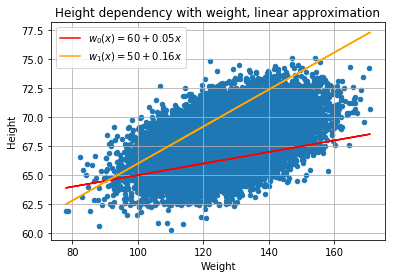

In [11]:
data.plot(x='Weight', y='Height', kind='scatter', title="Height dependency with weight, linear approximation")
x = data['Weight']

w0 = 60 + 0.05 * x
w1 = 50 + 0.16 * x

plt.plot(x, w0, color='red', label='$w_0(x) = 60 + 0.05x$')
plt.plot(x, w1, color='orange', label='$w_1(x) = 50 + 0.16x$')
plt.legend()
plt.grid()

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 50:

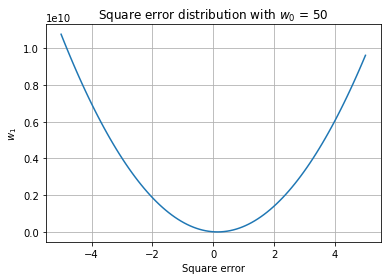

In [12]:
y = []
w1_range = np.linspace(-5, 5, 100)

for w1 in w1_range:
    y.append(mse(50, w1))
    
plt.plot(w1_range, y)
plt.title("Square error distribution with $w_{0}$ = 50")
plt.ylabel("$w_{1}$")
plt.xlabel("Square error")
plt.grid()

С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции для значений параметра $w_1$ в диапазоне [-5,5]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$)

In [13]:
# Сначала найдем оптимальное значение w_opt
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings("ignore") 


def f(w1):
    return mse(50, w1)

func_min = minimize_scalar(f, bounds=(-5, 5))
print(func_min)
print('function minimum ~= 0.14109203')

# Значит, максимальный наклон ~= 0,14109.

     fun: 79512.217286994986
    nfev: 6
     nit: 5
 success: True
       x: 0.1410920372883438
function minimum ~= 0.14109203


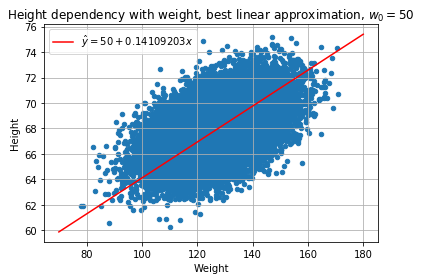

In [14]:
# Теперь строим график с получившимся наклоном


x = np.linspace(70, 180, 100)
y = 50 + 0.14109203 * x

data.plot(x='Weight', y='Height', kind='scatter', title="Height dependency with weight, best linear approximation, $w_{0} = 50$")
plt.plot(x,y, color='red', label='$\^y = 50 + 0.14109203x$')
plt.legend()
plt.grid()

Постройте 3D-график зависимости функции ошибки от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

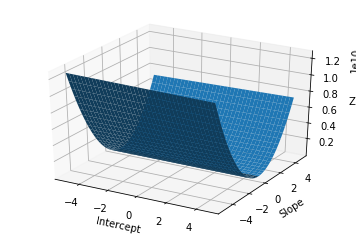

In [15]:
from mpl_toolkits.mplot3d import Axes3D

def draw_xy_3d(X,Y,func):
    
    """ Draw 3D plot of 2 variables dependency by function """
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    x_len = X.shape[0]
    
    Z=np.zeros((x_len, x_len))
    for i in range(x_len):
        for j in range(x_len):
            Z[i,j] = func(X[i,j], Y[i,j])
            
    surf = ax.plot_surface(X, Y, Z)
    ax.set_xlabel('Intercept')
    ax.set_ylabel('Slope')
    ax.set_zlabel('Z')
    plt.show()

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)    
w0, w1 = np.meshgrid(w0, w1)
draw_xy_3d(w0, w1, mse)

## Второй метод оптимизации

Используйте метод оптимизации L-BFGS-B

In [16]:
def mse(W):
    return np.sum(np.power(data.Height - (W[0] + W[1] * data.Weight), 2))


from scipy.optimize import minimize 
bnds = ((-100, 100), (-5, 5))
best_w = minimize(mse, x0=(0,0), bounds=bnds, method='L-BFGS-B')
print(best_w)

      fun: 67545.287086674711
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00291038,  0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([ 57.57179162,   0.08200637])


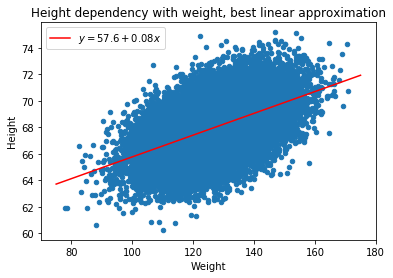

In [17]:
x = np.linspace(75, 175, 21)
y = 57.57179 + 0.08200 * x

data.plot(x='Weight', y='Height', kind='scatter', title="Height dependency with weight, best linear approximation")
plt.plot(x, y, color='red', label='$y = 57.6 + 0.08x$')
plt.legend()